# 0- Import library

In [1]:
import os
import numpy as np
from glob import glob
from tqdm import tqdm
import pickle as pkl
import json
import random
from collections import Counter

# Data Viz
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# File & Data Processing
import pandas as pd
import zipfile
import itertools
from sklearn.model_selection import train_test_split

# Training model
import tensorflow as tf
import math
from tqdm.notebook import tqdm  # Progress bar

# Submission
from scipy import sparse

# 1- Helper function

In [2]:
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

set_seed(42)

In [3]:
def show_line_plot(data, name_xlabel, name_ylabel, name_title, name_label):
    plt.figure(figsize = (15,4))
    plt.xlabel(name_xlabel)
    plt.ylabel(name_ylabel)
    plt.title(name_title)
    plt.plot(data, label=name_label)
    plt.legend()
    plt.grid(True)
    plt.show()

def show_countplot(data, column, order, name_xlabel, name_ylabel, name_title, vertical = False):
    plt.figure(figsize = (15, 8))
    ax = sns.countplot(x = column, data = data, order = order)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f"{int(height)}", (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)
    if (vertical == True):
      plt.xticks(rotation = "vertical")
    plt.xlabel(name_xlabel)
    plt.ylabel(name_ylabel)
    plt.title(name_title)
    plt.show()

def show_barplot_group(data, x_column, y_column, estimator, order, name_xlabel, name_ylabel, name_title, vertical = False):
    plt.figure(figsize = (15, 8))
    ax = sns.barplot(data = data, x = x_column, y = y_column, estimator = estimator, order = order)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, -50),
                    textcoords = 'offset points')
    if (vertical == True):
        plt.xticks(rotation = "vertical")
    plt.xlabel(name_xlabel)
    plt.ylabel(name_ylabel)
    plt.title(name_title)
    plt.show()

def show_barplot_individual(data, column, name_xlabel, name_ylabel, name_title, rotation = 45, column_x = None):
    plt.figure(figsize = (10, 5))
    ax = data[column].plot(kind = 'bar', color = 'blue')
    if (column_x != None):
        ax.set_xticklabels(data[column_x], rotation = rotation)
    else:
        ax.set_xticklabels(data.index, rotation = rotation)
    plt.title(name_title)
    plt.xlabel(name_xlabel)
    plt.ylabel(name_ylabel)
    plt.show()

def show_violin_plot(data, x_column, y_column, name_xlabel, name_ylabel, name_title, vertical = False):
    plt.figure(figsize = (15, 8))
    sns.violinplot(data = data, x = x_column, y = y_column)
    if (vertical == True):
        plt.xticks(rotation = "vertical")
    plt.xlabel(name_xlabel)
    plt.ylabel(name_ylabel)
    plt.title(name_title)
    plt.show()

def show_KDE_plot(data, x_column, hue_column, name_xlabel, name_title, vertical = False):
    plt.figure(figsize = (15, 8))
    sns.kdeplot(x = data[x_column], hue = data[hue_column], label = name_xlabel)
    if (vertical == True):
        plt.xticks(rotation = "vertical")
    plt.xlabel(name_xlabel)
    plt.title(name_title)
    plt.show()

def show_circle_plot(data, name_title):
    fig = px.pie(names=data.index, values=data.values)
    fig.update_layout({"title":{'text': name_title,"x":0.5}})
    fig.show()

def show_multibar_plot(data, name_xlabel, name_ylabel, name_legend, name_title):
  ax = data.plot(kind = 'bar', title = name_title)
  ax.set(xlabel=name_xlabel, ylabel=name_ylabel)
  plt.legend(loc=(1.05, 0.5), title=name_legend)
  plt.show()

# 2- Read Data

## 2.1- Download dataset

In [4]:
!gdown 1Ir1Dfemhti5qXe4EtrMOPoQUOP0OREwr
!gdown 1rJ0Fqv7aDw-QD9ZI81BTF2OEkq4OY9ZN
!gdown 1qsBeOeW_7g4O2EcO84OVgBkhKbTZuTy3

Downloading...
From: https://drive.google.com/uc?id=1Ir1Dfemhti5qXe4EtrMOPoQUOP0OREwr
To: /kaggle/working/train.json
100%|███████████████████████████████████████| 14.0M/14.0M [00:00<00:00, 233MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rJ0Fqv7aDw-QD9ZI81BTF2OEkq4OY9ZN
To: /kaggle/working/validation.json
100%|███████████████████████████████████████| 3.51M/3.51M [00:00<00:00, 179MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qsBeOeW_7g4O2EcO84OVgBkhKbTZuTy3
To: /kaggle/working/public_test.pkl
100%|████████████████████████████████████████| 122k/122k [00:00<00:00, 89.0MB/s]


## 2.2- Read

In [5]:
with open('./train.json') as f:
    train_sentences = json.load(f)

with open('./validation.json') as f:
    val_sentences = json.load(f)

with open('./public_test.pkl', "rb") as f:
    public_test = pkl.load(f)

In [6]:
train_dataset = pd.DataFrame(train_sentences)
val_dataset = pd.DataFrame(val_sentences)
public_test_dataset = pd.DataFrame({"sentence": public_test})

In [7]:
train_dataset

,id,sentence
0,51bc70f7-794a-490a-bd73-1c307fc074ca,"[2, 559, 158, 31, 158, 2, 8, 870, 158, 2, 46, ..."
1,6969b123-ff00-4644-90b5-06e83d2f2053,"[2, 869, 2, 11, 46, 2, 481, 870, 869, 481, 158..."
2,c6eaa2ce-fd37-4ba4-b00b-02d80cb59c26,"[38, 2, 559, 158, 2, 2, 11, 1529, 158, 2, 2, 3..."
3,069d51fd-7252-4859-a026-2181a9520048,"[2, 869, 559, 1154, 5]"
4,ee6466e6-3954-4de8-8220-edbed25245df,"[2, 869, 427, 2, 8, 312, 869, 389, 46, 2, 2, 3..."
...,...,...
10029,74063cc6-b299-4d6d-8124-87b9c8e01d17,"[2, 1154, 869, 46, 559, 158, 870, 2, 8, 516, 4..."
10030,7e2776d8-347b-4fac-b9df-b3119e2bfd30,"[2, 2, 516, 158, 426, 46, 2, 1884, 869, 389, 2..."
10031,85377280-94d2-4be5-8d1d-39a0c50266f5,"[2, 869, 427, 2, 46, 869, 2, 31, 46, 8, 870, 4..."
10032,6e19317a-c513-4c5d-9a31-0c508801cb01,"[2, 158, 31, 5, 2, 2, 2, 1045, 1154, 869, 427,..."


In [8]:
val_dataset

,id,sentence
0,e8f0098e-8b7f-4a7f-83af-6e1e06dbd6a0,"[2, 869, 870, 11, 158, 2, 2, 158, 11, 468, 559..."
1,ae3d1874-9dae-4df5-877d-0acec6e9668b,"[2, 559, 158, 1884, 2, 1154, 158, 158, 224, 2,..."
2,9bba34a3-6dd4-46f7-8a98-ed7923675c2f,"[2, 559, 158, 870, 158, 2, 11, 31, 2, 8, 2, 51..."
3,90501fd3-ae94-4ed3-8768-556750ee7e04,"[9, 2, 158, 1154, 870, 869, 1154, 468, 31, 31,..."
4,708822ba-f01f-45ef-bb1a-ecac3b030d45,"[46, 559, 158, 11, 870, 2, 481, 11, 2, 2, 8, 2..."
...,...,...
2504,f1cb6a1b-53e9-476d-a676-0ddbd2ce399d,"[2, 8, 516, 516, 2, 11, 426, 2, 1884, 869, 389..."
2505,17f508e5-c407-4953-a042-7a5d6d2808db,"[2, 559, 158, 2, 158, 569, 695, 158, 516, 516,..."
2506,5b67765f-abb0-4883-9c8a-50360bb68074,"[2, 559, 158, 2, 11, 1154, 46, 158, 870, 11, 1..."
2507,aa1e4a76-3f7e-4898-897f-f71cd01b1405,"[193, 2, 9, 2, 158, 8, 31, 1884, 3]"


In [9]:
public_test_dataset

,sentence
0,"[2, 870, 869, 112, 2, 46, <MASK>, 158, 2, 2, <..."
1,"[2, 870, <MASK>, 31, 11, 224, 158, <MASK>, 46,..."
2,"[2, <MASK>, 31, 559, 2, 1154, 869, 112, 11, 11..."
3,"[90, 90, 90]"
4,"[2, 389, 31, 559, 2, <MASK>, <MASK>, 31, 869, ..."
...,...
745,"[2, 11, 112, 5]"
746,"[2, <MASK>, 1045, 158, 2, <MASK>, 2, 516, 869,..."
747,"[2, 2, 46, 870, 11, 158, 224, 2, 46, 869, 2, <..."
748,"[2, 31, 2, 46, 559, 11, 31, <MASK>, 559, 869, ..."


# 3- Data information

In [10]:
print("Number of sentence in train dataset: ", train_dataset.shape[0])
print("Number of sentence in validation dataset: ", val_dataset.shape[0])
print("Number of sentence in public test dataset: ", public_test_dataset.shape[0])

Number of sentence in train dataset:  10034
Number of sentence in validation dataset:  2509
Number of sentence in public test dataset:  750


In [11]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10034 entries, 0 to 10033
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        10034 non-null  object
 1   sentence  10034 non-null  object
dtypes: object(2)
memory usage: 156.9+ KB


In [12]:
val_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        2509 non-null   object
 1   sentence  2509 non-null   object
dtypes: object(2)
memory usage: 39.3+ KB


In [13]:
public_test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  750 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


# 4- Understanding data

## 4.1- Statistic about text length for each sentence

In [14]:
train_dataset["text_len"] = train_dataset['sentence'].apply(len)
train_dataset.head()

,id,sentence,text_len
0,51bc70f7-794a-490a-bd73-1c307fc074ca,"[2, 559, 158, 31, 158, 2, 8, 870, 158, 2, 46, ...",147
1,6969b123-ff00-4644-90b5-06e83d2f2053,"[2, 869, 2, 11, 46, 2, 481, 870, 869, 481, 158...",48
2,c6eaa2ce-fd37-4ba4-b00b-02d80cb59c26,"[38, 2, 559, 158, 2, 2, 11, 1529, 158, 2, 2, 3...",17
3,069d51fd-7252-4859-a026-2181a9520048,"[2, 869, 559, 1154, 5]",5
4,ee6466e6-3954-4de8-8220-edbed25245df,"[2, 869, 427, 2, 8, 312, 869, 389, 46, 2, 2, 3...",41


In [15]:
val_dataset["text_len"] = val_dataset['sentence'].apply(len)
val_dataset.head()

,id,sentence,text_len
0,e8f0098e-8b7f-4a7f-83af-6e1e06dbd6a0,"[2, 869, 870, 11, 158, 2, 2, 158, 11, 468, 559...",17
1,ae3d1874-9dae-4df5-877d-0acec6e9668b,"[2, 559, 158, 1884, 2, 1154, 158, 158, 224, 2,...",42
2,9bba34a3-6dd4-46f7-8a98-ed7923675c2f,"[2, 559, 158, 870, 158, 2, 11, 31, 2, 8, 2, 51...",40
3,90501fd3-ae94-4ed3-8768-556750ee7e04,"[9, 2, 158, 1154, 870, 869, 1154, 468, 31, 31,...",39
4,708822ba-f01f-45ef-bb1a-ecac3b030d45,"[46, 559, 158, 11, 870, 2, 481, 11, 2, 2, 8, 2...",58


In [16]:
public_test_dataset["text_len"] = public_test_dataset['sentence'].apply(len)
public_test_dataset.head()

,sentence,text_len
0,"[2, 870, 869, 112, 2, 46, <MASK>, 158, 2, 2, <...",30
1,"[2, 870, <MASK>, 31, 11, 224, 158, <MASK>, 46,...",121
2,"[2, <MASK>, 31, 559, 2, 1154, 869, 112, 11, 11...",152
3,"[90, 90, 90]",3
4,"[2, 389, 31, 559, 2, <MASK>, <MASK>, 31, 869, ...",161


In [17]:
train_dataset['text_len'].describe()

count    10034.000000
mean        79.316823
std         62.780024
min          1.000000
25%         33.000000
50%         66.000000
75%        109.000000
max        612.000000
Name: text_len, dtype: float64

In [18]:
val_dataset['text_len'].describe()

count    2509.000000
mean       79.587884
std        62.718409
min         1.000000
25%        35.000000
50%        66.000000
75%       108.000000
max       771.000000
Name: text_len, dtype: float64

In [19]:
public_test_dataset['text_len'].describe()

count    750.000000
mean      68.128000
std       60.136735
min        1.000000
25%       19.000000
50%       52.000000
75%      100.000000
max      390.000000
Name: text_len, dtype: float64

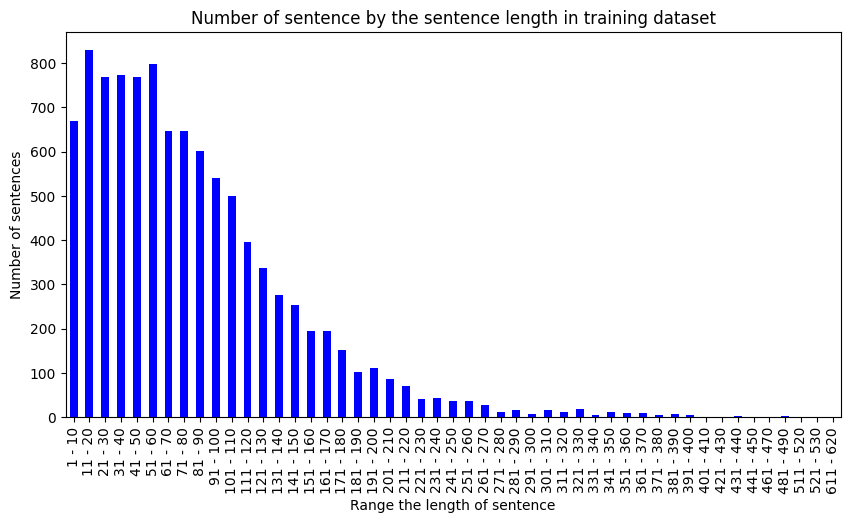

In [20]:
BIN_SIZE = 10

count_frequency_train = (train_dataset['text_len'] // BIN_SIZE) * BIN_SIZE  # Groups: 0-99, 100-199, etc.

# Count occurrences per bin
count_frequency_train = count_frequency_train.value_counts().sort_index()

# Convert to DataFrame with range labels
summary_len_train = pd.DataFrame({
    'Range': [f"{i + 1} - {i + BIN_SIZE}" for i in count_frequency_train.index],
    'Frequency': count_frequency_train.values
})

show_barplot_individual(summary_len_train, 'Frequency', "Range the length of sentence", "Number of sentences", "Number of sentence by the sentence length in training dataset", 90, "Range")

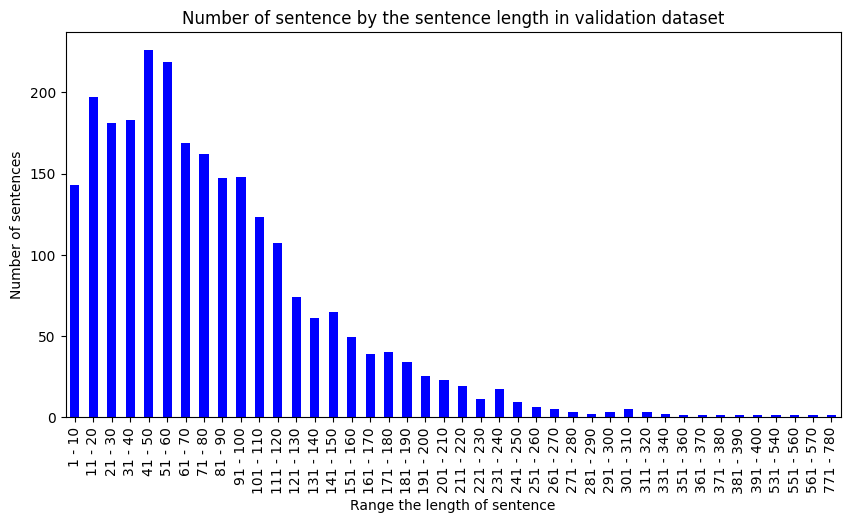

In [21]:
count_frequency_val = (val_dataset['text_len'] // BIN_SIZE) * BIN_SIZE  # Groups: 0-99, 100-199, etc.

# Count occurrences per bin
count_frequency_val = count_frequency_val.value_counts().sort_index()

# Convert to DataFrame with range labels
summary_len_val = pd.DataFrame({
    'Range': [f"{i + 1} - {i + BIN_SIZE}" for i in count_frequency_val.index],
    'Frequency': count_frequency_val.values
})

show_barplot_individual(summary_len_val, 'Frequency', "Range the length of sentence", "Number of sentences", "Number of sentence by the sentence length in validation dataset", 90, "Range")

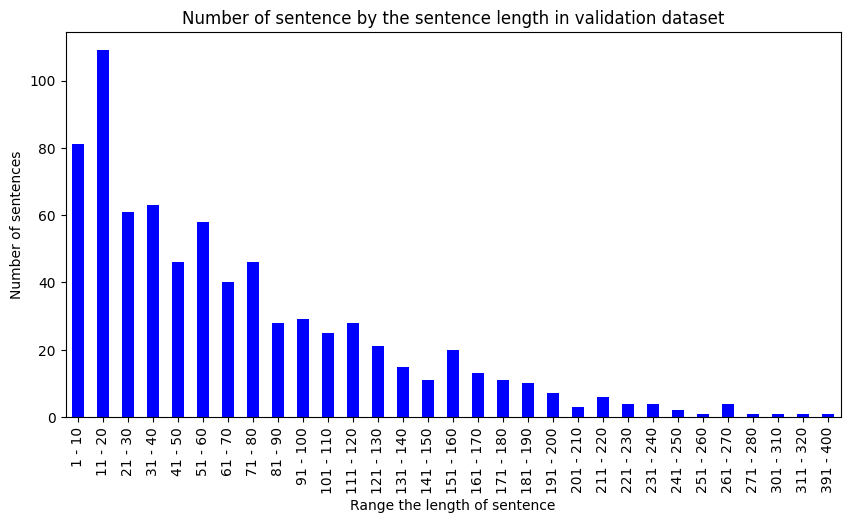

In [22]:
count_frequency_public_test = (public_test_dataset['text_len'] // BIN_SIZE) * BIN_SIZE  # Groups: 0-99, 100-199, etc.

# Count occurrences per bin
count_frequency_public_test = count_frequency_public_test.value_counts().sort_index()

# Convert to DataFrame with range labels
summary_len_public_test = pd.DataFrame({
    'Range': [f"{i + 1} - {i + BIN_SIZE}" for i in count_frequency_public_test.index],
    'Frequency': count_frequency_public_test.values
})

show_barplot_individual(summary_len_public_test, 'Frequency', "Range the length of sentence", "Number of sentences", "Number of sentence by the sentence length in validation dataset", 90, "Range")

## 4.2- Statistic about the frequency of token used for each dataset

In [23]:
all_tokens_train = list(itertools.chain.from_iterable(train_dataset['sentence']))
all_tokens_val = list(itertools.chain.from_iterable(val_dataset['sentence']))
all_tokens_public_test = list(itertools.chain.from_iterable(public_test_dataset['sentence']))

In [24]:
count_token_train = Counter(all_tokens_train)
count_token_val = Counter(all_tokens_val)
count_token_public_test = Counter(all_tokens_public_test)

In [25]:
summary_token_train = pd.DataFrame(count_token_train.items(), columns=['Token', 'Frequency']).sort_values(by='Frequency', ascending=False)
summary_token_train

,Token,Frequency
0,2,163336
2,158,74583
6,46,54238
4,8,50844
11,869,47055
...,...,...
68,3233,8
72,2884,7
71,4067,6
53,3623,6


In [26]:
summary_token_val = pd.DataFrame(count_token_val.items(), columns=['Token', 'Frequency']).sort_values(by='Frequency', ascending=False)
summary_token_val

,Token,Frequency
0,2,40891
4,158,18807
11,46,13532
14,8,12848
1,869,11766
...,...,...
62,1732,4
66,856,3
64,2884,2
61,3623,1


In [27]:
summary_token_public_test = pd.DataFrame(count_token_public_test.items(), columns=['Token', 'Frequency']).sort_values(by='Frequency', ascending=False)
summary_token_public_test

,Token,Frequency
0,2,8707
5,<MASK>,7682
6,158,4021
4,46,2948
15,8,2790
...,...,...
61,162,2
47,739,1
46,738,1
59,447,1


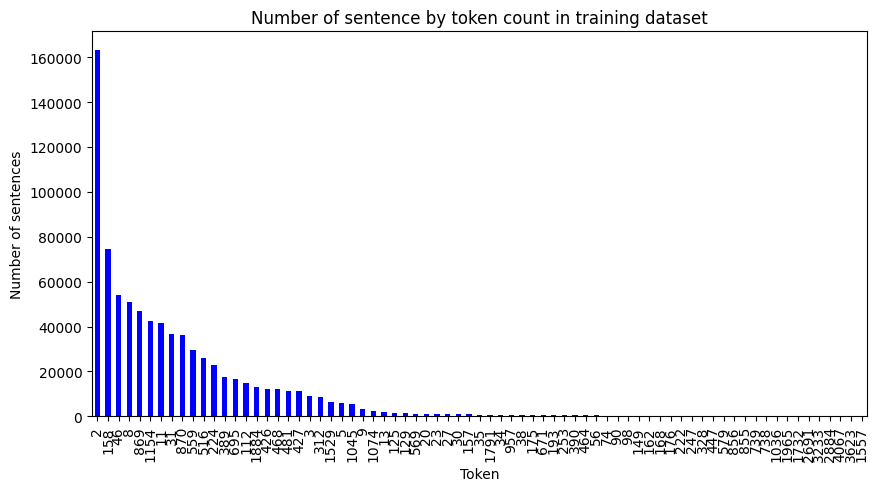

In [28]:
show_barplot_individual(summary_token_train, 'Frequency', "Token", "Number of sentences", "Number of sentence by token count in training dataset", 90, "Token")

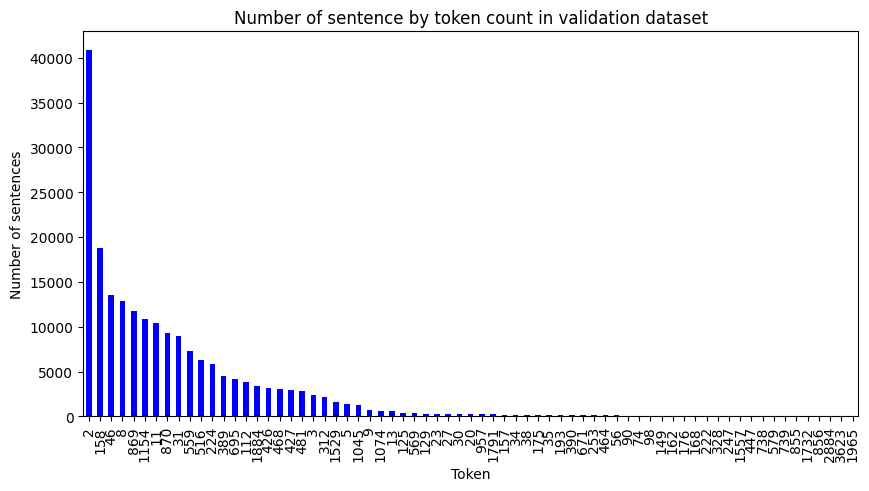

In [29]:
show_barplot_individual(summary_token_val, 'Frequency', "Token", "Number of sentences", "Number of sentence by token count in validation dataset", 90, "Token")

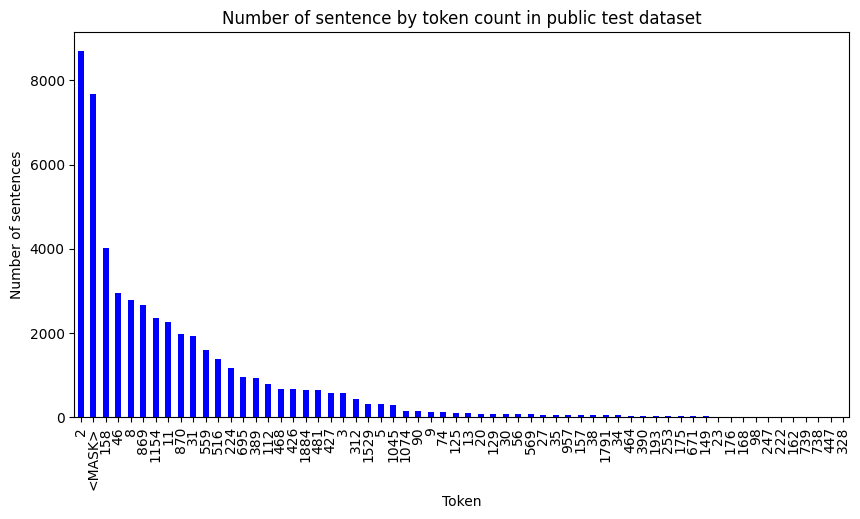

In [30]:
show_barplot_individual(summary_token_public_test, 'Frequency', "Token", "Number of sentences", "Number of sentence by token count in public test dataset", 90, "Token")

# 5- Preprocess data

## 5.1- Setting hyperparameters and alias of some special token

Define max sequence length, and some special token IDs here. \
**Please do not modify these cells** to keep these arguments intact for consistency during training and validation

In [31]:
# DO NOT MODIFY
SEQ_LEN = 30
PAD_TOKEN_ID = 0
MASK_TOKEN_ID = 1
UNK_TOKEN_ID = 2
MAX_VOCAB_SIZE = 4214  # Limit vocabulary size

## 5.2- Chunking and Padding the sentence

Because almost sentence have `length > SEQ_LEN`, so we need to chunk the text

In [32]:
def chunk_texts(examples, block_size=SEQ_LEN):
    """
    Processes each text (tokenized as a list of token IDs) in the "sentence" field.

    For each text:
      - If its length is less than or equal to block_size, it is left unchanged.
      - If its length is greater than block_size, it is split into non-overlapping chunks of length block_size.
        Any remaining tokens that do not form a full chunk are also included.

    Parameters:
      examples : dict
          A dictionary with a key "sentence" whose value is a list of tokenized texts
          (each text is a list of token IDs).
      block_size : int
          The desired fixed length of each chunk.

    Returns:
      pd.DataFrame:
          A DataFrame with a key "input_ids" containing a list of sequences. Each sequence is either:
            - the original text (if its length ≤ block_size) or
            - a chunk of length block_size, except possibly the last chunk which may have a length < block_size.
    """
    output_chunks = []

    for text in examples["sentence"]:
        if len(text) <= block_size:
            # If text is shorter than or equal to block_size, add it unchanged.
            output_chunks.append(text)
        else:
            # Split text into full chunks of block_size.
            num_full_chunks = len(text) // block_size
            for i in range(num_full_chunks):
                chunk = text[i * block_size : (i + 1) * block_size]
                output_chunks.append(chunk)
            # Check for any remaining tokens and add them as well.
            remainder = len(text) % block_size
            if remainder:
                chunk = text[-remainder:]
                output_chunks.append(chunk)

    return pd.DataFrame({"input_ids": output_chunks})

In [33]:
train_dataset_processed = chunk_texts(train_dataset)
train_dataset_processed['text_len'] = train_dataset_processed['input_ids'].apply(len)
train_dataset_processed.head()

,input_ids,text_len
0,"[2, 559, 158, 31, 158, 2, 8, 870, 158, 2, 46, ...",30
1,"[31, 46, 870, 869, 1884, 2, 31, 869, 695, 11, ...",30
2,"[695, 870, 8, 481, 426, 158, 31, 46, 2, 46, 55...",30
3,"[8, 31, 2, 312, 158, 695, 869, 112, 158, 2, 38...",30
4,"[158, 2, 695, 389, 516, 46, 389, 870, 158, 5, ...",27


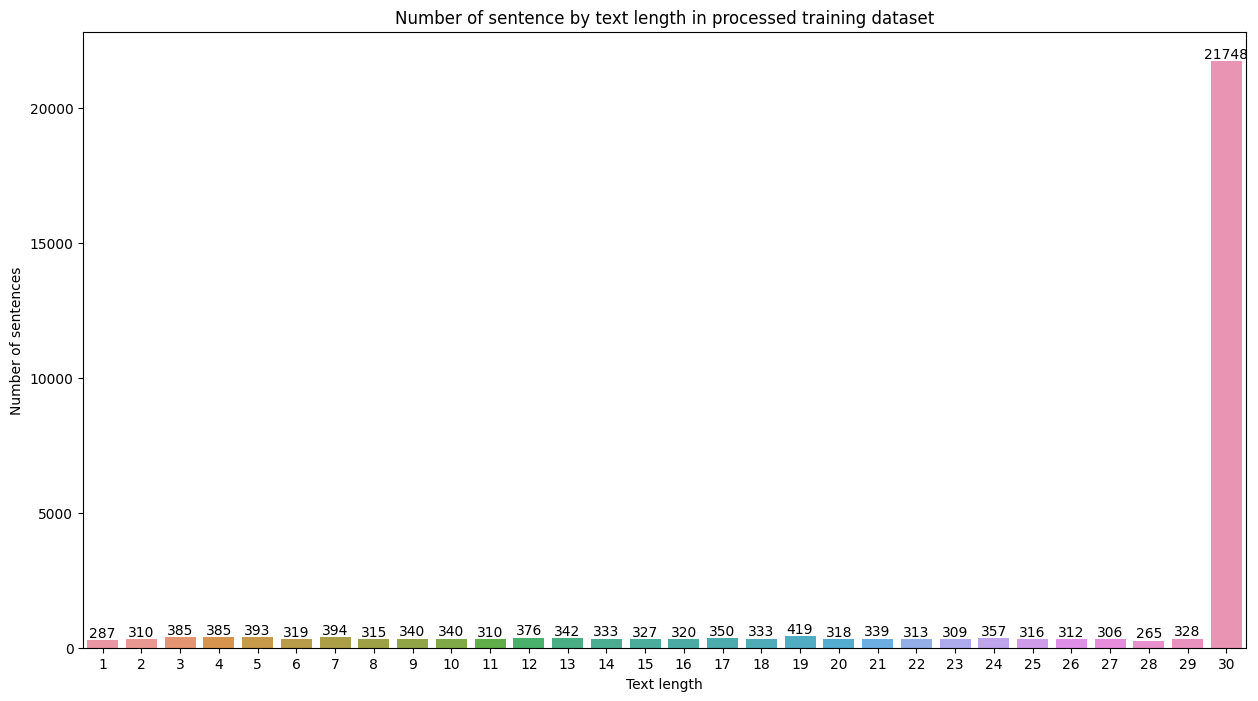

In [34]:
show_countplot(train_dataset_processed, 'text_len', None, "Text length", "Number of sentences", "Number of sentence by text length in processed training dataset", vertical = False)

In [35]:
val_dataset_processed = chunk_texts(val_dataset)
val_dataset_processed['text_len'] = val_dataset_processed['input_ids'].apply(len)
val_dataset_processed.head()

,input_ids,text_len
0,"[2, 869, 870, 11, 158, 2, 2, 158, 11, 468, 559...",17
1,"[2, 559, 158, 1884, 2, 1154, 158, 158, 224, 2,...",30
2,"[2, 870, 869, 869, 112, 31, 2, 2, 2, 2, 2, 3]",12
3,"[2, 559, 158, 870, 158, 2, 11, 31, 2, 8, 2, 51...",30
4,"[2, 559, 158, 870, 1154, 869, 312, 1884, 516, 3]",10


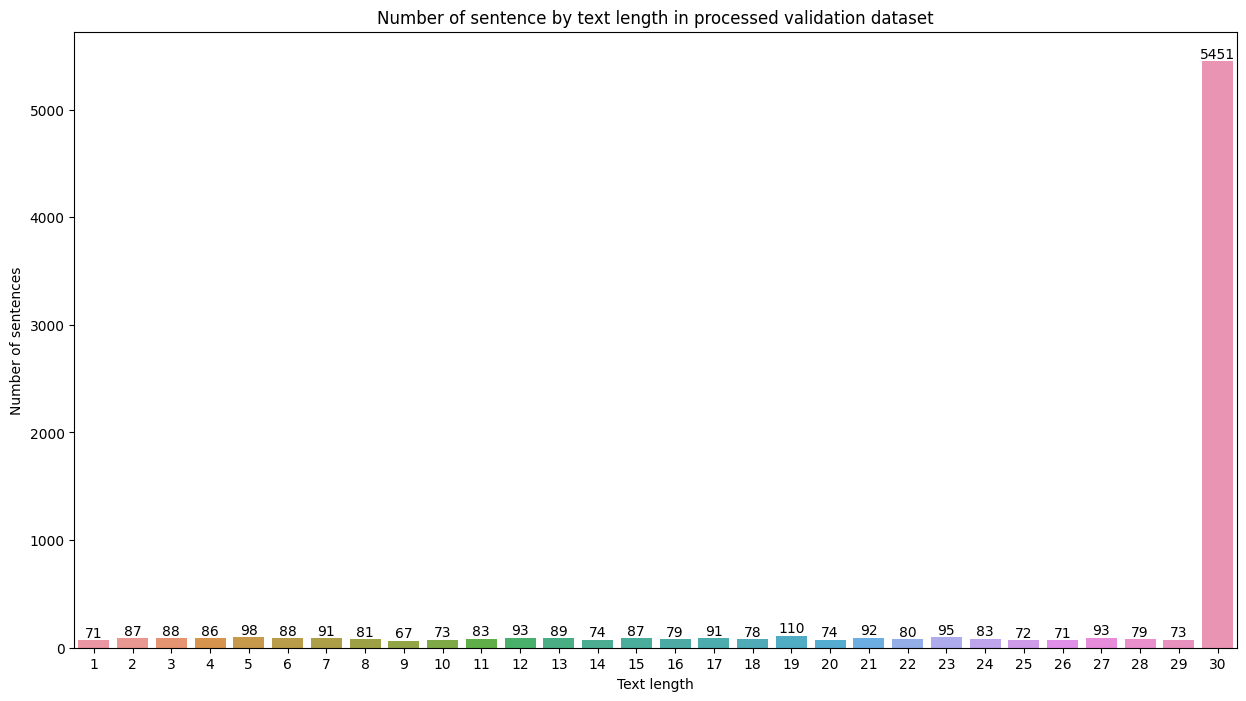

In [36]:
show_countplot(val_dataset_processed, 'text_len', None, "Text length", "Number of sentences", "Number of sentence by text length in processed validation dataset", vertical = False)

Let's pad the train and validation datasets to max length with `PAD_TOKEN_ID`, and turn them into torch tensors

In [37]:
# Function to pad sentences
def pad_sentences(tokenized, seq_len):
    padded = [tokens[:seq_len] + [PAD_TOKEN_ID] * max(0, seq_len - len(tokens)) for tokens in tokenized]
    return np.array(padded, dtype=np.int32)

In [38]:
train_dataset_processed['input_ids_preprocessed'] = list(pad_sentences(train_dataset_processed['input_ids'], SEQ_LEN))
train_dataset_processed.head()

,input_ids,text_len,input_ids_preprocessed
0,"[2, 559, 158, 31, 158, 2, 8, 870, 158, 2, 46, ...",30,"[2, 559, 158, 31, 158, 2, 8, 870, 158, 2, 46, ..."
1,"[31, 46, 870, 869, 1884, 2, 31, 869, 695, 11, ...",30,"[31, 46, 870, 869, 1884, 2, 31, 869, 695, 11, ..."
2,"[695, 870, 8, 481, 426, 158, 31, 46, 2, 46, 55...",30,"[695, 870, 8, 481, 426, 158, 31, 46, 2, 46, 55..."
3,"[8, 31, 2, 312, 158, 695, 869, 112, 158, 2, 38...",30,"[8, 31, 2, 312, 158, 695, 869, 112, 158, 2, 38..."
4,"[158, 2, 695, 389, 516, 46, 389, 870, 158, 5, ...",27,"[158, 2, 695, 389, 516, 46, 389, 870, 158, 5, ..."


In [39]:
val_dataset_processed['input_ids_preprocessed'] = list(pad_sentences(val_dataset_processed['input_ids'], SEQ_LEN))
val_dataset_processed.head()

,input_ids,text_len,input_ids_preprocessed
0,"[2, 869, 870, 11, 158, 2, 2, 158, 11, 468, 559...",17,"[2, 869, 870, 11, 158, 2, 2, 158, 11, 468, 559..."
1,"[2, 559, 158, 1884, 2, 1154, 158, 158, 224, 2,...",30,"[2, 559, 158, 1884, 2, 1154, 158, 158, 224, 2,..."
2,"[2, 870, 869, 869, 112, 31, 2, 2, 2, 2, 2, 3]",12,"[2, 870, 869, 869, 112, 31, 2, 2, 2, 2, 2, 3, ..."
3,"[2, 559, 158, 870, 158, 2, 11, 31, 2, 8, 2, 51...",30,"[2, 559, 158, 870, 158, 2, 11, 31, 2, 8, 2, 51..."
4,"[2, 559, 158, 870, 1154, 869, 312, 1884, 516, 3]",10,"[2, 559, 158, 870, 1154, 869, 312, 1884, 516, ..."


## 5.3- Split dataset

In [40]:
SUBMISSION_MODE = 0 # 0: Not submit, 1: Submit public test

X_train = train_dataset_processed
if (SUBMISSION_MODE == 0):
    # X_val, X_test = val_dataset_processed, val_dataset_processed # Must use all set to learn all context features
    X_val, X_test = train_test_split(val_dataset_processed, test_size = 0.5, random_state = 42, stratify = val_dataset_processed['text_len'])
else:
    X_val, X_test = val_dataset_processed, public_test_dataset

train_tensor = tf.convert_to_tensor(X_train['input_ids_preprocessed'].tolist())
val_tensor = tf.convert_to_tensor(X_val['input_ids_preprocessed'].tolist())
test_tensor = tf.convert_to_tensor(X_test['input_ids_preprocessed'].tolist())

# 6- Model training

## 6.1- Helper function

### 6.1.1- Masking the sentence helper

In [41]:
MAX_MASKING_RATE = 0.15

In [42]:
def apply_mask(image_tokens, max_masking_rate = MAX_MASKING_RATE):
    """
    Applies random masking to token sequences in TensorFlow.

    Parameters:
      image_tokens (tf.Tensor): A tensor of shape (batch_size, seq_len) representing token IDs.
      max_masking_rate: An object with the maximum masking must have

    Returns:
      input_ids (tf.Tensor): Masked token IDs where masked positions are replaced with the mask token.
      labels (tf.Tensor): Labels for loss calculation; unmasked positions are set to -100.
      mask (tf.Tensor): A boolean tensor of shape (batch_size, seq_len) indicating masked positions.
      mask_prob (tf.Tensor): A tensor of shape (batch_size,) with the masking probability for each sample.
    """
    batch_size = tf.shape(image_tokens)[0]
    seq_len = tf.shape(image_tokens)[1]

    # Sample a random value for each sample in the batch.
    timesteps = tf.random.uniform(shape=(batch_size,), minval=0.0, maxval=1.0, dtype=tf.float32)

    # Compute the masking probability using a cosine schedule.
    min_masking_rate = 2 / tf.cast(seq_len, tf.float32)
    mask_prob = (max_masking_rate - min_masking_rate) * (1.0 - timesteps) + min_masking_rate

    # Calculate the number of tokens to mask for each sample.
    # Convert seq_len to float for the multiplication, then round and ensure at least 1 token is masked.
    num_token_masked = tf.cast(
        tf.maximum(tf.round(tf.cast(seq_len, tf.float32) * mask_prob), 1),
        tf.int32
    )

    # Generate a random permutation of indices for each sample.
    rand_vals = tf.random.uniform(shape=(batch_size, seq_len), minval=0.0, maxval=1.0, dtype=tf.float32)
    batch_randperm = tf.argsort(rand_vals, axis=-1, direction='ASCENDING')

    # Create a mask: for each sample, positions with a rank less than num_token_masked are masked.
    mask = tf.less(batch_randperm, tf.expand_dims(num_token_masked, axis=-1))

    # Ensure that positions with PAD_TOKEN_ID tokens are not masked.
    pad_mask = tf.not_equal(image_tokens, PAD_TOKEN_ID)
    mask = tf.logical_and(mask, pad_mask)

    # Replace tokens with MASK_TOKEN_ID where the mask is True.
    input_ids = tf.where(mask, tf.fill(tf.shape(image_tokens), MASK_TOKEN_ID), image_tokens)

    # Create labels: keep the original token id for masked positions, set unmasked positions to -100.
    labels = tf.where(~mask, image_tokens, tf.constant(-100, dtype=image_tokens.dtype))

    return input_ids, image_tokens, mask

In [43]:
# Validation code
input_ids, labels, mask = apply_mask(tf.convert_to_tensor([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
]), 0.1)

print(f"input_ids: {input_ids}")
print(f"labels: {labels}")
print(f"mask: {mask}")

input_ids: [[1 1 3]
 [1 5 6]
 [7 8 1]]
labels: [[1 2 3]
 [4 5 6]
 [7 8 9]]
mask: [[False  True False]
 [ True False False]
 [False False  True]]


In [44]:
# Validation code have PAD_TOKEN_ID
input_ids, labels, mask = apply_mask(tf.convert_to_tensor([
    [1, 2, 3],
    [PAD_TOKEN_ID, 5, 6],
    [7, PAD_TOKEN_ID, 9],
]), 0.1)

print(f"input_ids: {input_ids}")
print(f"labels: {labels}")
print(f"mask: {mask}")

input_ids: [[1 2 1]
 [0 5 1]
 [7 0 9]]
labels: [[1 2 3]
 [0 5 6]
 [7 0 9]]
mask: [[ True False  True]
 [False False  True]
 [False False False]]


### 6.1.2- Metric function

In [45]:
# Brier Score Calculation
def compute_brier_score(predictions, targets, mask):
    masked_preds = tf.boolean_mask(predictions, mask)
    masked_targets = tf.boolean_mask(targets, mask)

    if tf.size(masked_preds) == 0:
        return tf.constant(0.0, dtype=tf.float32)

    probabilities = tf.nn.softmax(masked_preds, axis=-1)  # Convert logits to probabilities
    # print('probs: ',probabilities)
    target_probs = tf.one_hot(masked_targets, depth=MAX_VOCAB_SIZE, dtype=tf.float32)  # One-hot encode targets

    return tf.reduce_mean(tf.reduce_sum(tf.square(probabilities - target_probs), axis=-1))  # Brier Score

### 6.1.3- Other

In [46]:
def shape_list(x):
    """
    Deal with dynamic shape in tensorflow cleanly.

    Args:
        x (:obj:`tf.Tensor`): The tensor we want the shape of.

    Returns:
        :obj:`List[int]`: The shape of the tensor as a list.
    """
    static = x.shape.as_list()
    dynamic = tf.shape(x)
    return [dynamic[i] if s is None else s for i, s in enumerate(static)]

def compute_loss(loss_fn, labels, logits):
    # make sure only labels that are not equal to -100
    # are taken into account as loss
    active_loss = tf.not_equal(tf.reshape(labels, (-1,)), -100)
    reduced_logits = tf.boolean_mask(tf.reshape(logits, (-1, shape_list(logits)[2])), active_loss)
    labels = tf.boolean_mask(tf.reshape(labels, (-1,)), active_loss)
    return loss_fn(labels, reduced_logits)

## 6.2- Model

In [47]:
## DO NOT MODIFY
class RNNMLM(tf.keras.Model):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_layers, dropout_rate=0.3):
        super(RNNMLM, self).__init__()
        self.embedding = tf.keras.layers.Embedding(vocab_size, embed_dim, mask_zero=True)
        self.dropout = tf.keras.layers.Dropout(dropout_rate)
        self.lstm = tf.keras.layers.Bidirectional(
            tf.keras.layers.LSTM(hidden_dim, return_sequences=True, recurrent_initializer='glorot_uniform', dropout=dropout_rate)
        )
        self.layer_norm = tf.keras.layers.LayerNormalization()
        self.leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.1)
        self.fc = tf.keras.layers.Dense(vocab_size)

    def call(self, inputs, training=False):
        embedded = self.dropout(self.embedding(inputs), training=training)  # Dropout after embedding
        lstm_out = self.lstm(embedded, training=training)
        norm_out = self.layer_norm(lstm_out)
        activated = self.leaky_relu(norm_out)
        logits = self.fc(activated)
        return logits  # Shape: (batch_size, seq_len, vocab_size)

## 6.3- Setup hyperparameters and learning schedule

In [48]:
## DO NOT MODIFY
EMBED_DIM = 256
HIDDEN_DIM = 512
NUM_LAYERS = 2

In [49]:
LEARNING_RATE = 1e-3
EPOCHS = 100
BATCH_SIZE = 256
VALIDATION_PER_EPOCH = 2  # Validate every 1/4 epoch

In [50]:
# Instantiate model
model = RNNMLM(vocab_size = MAX_VOCAB_SIZE, embed_dim = EMBED_DIM, hidden_dim = HIDDEN_DIM, num_layers = NUM_LAYERS)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True, reduction = tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE)
optimizer = tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


## 6.4- Training model

In [51]:
# Training Loop
num_train_batches = len(train_tensor) // BATCH_SIZE
val_every = max(1, num_train_batches // VALIDATION_PER_EPOCH)
best_brier = float('inf')  # Initialize best Brier score

for epoch in range(EPOCHS):
    epoch_loss = 0.0

    with tqdm(total = num_train_batches, desc = f"Epoch {epoch + 1}/{EPOCHS}") as pbar:
        for i in range(0, len(train_tensor), BATCH_SIZE):
            batch = train_tensor[i : i + BATCH_SIZE]
            masked_batch, targets, mask = apply_mask(batch, MAX_MASKING_RATE)
            # print(targets.shape)
            with tf.GradientTape() as tape:
                logits = model(masked_batch)
                # print(logits.shape)
                loss = loss_fn(targets, logits)
                # loss = compute_loss(loss_fn, targets, logits)

            grads = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))

            epoch_loss += loss.numpy()
            pbar.set_postfix(loss = loss.numpy())
            pbar.update(1)

            # Validate every 1/n epoch
            if (i // BATCH_SIZE) % val_every == 0:
                # print(i)
                val_loss = 0.0
                val_brier = 0.0
                num_val_batches = len(val_tensor) // BATCH_SIZE

                for j in range(0, len(val_tensor), BATCH_SIZE):
                    val_batch = val_tensor[j : j + BATCH_SIZE]
                    masked_val_batch, val_targets, val_mask = apply_mask(val_batch, MAX_MASKING_RATE)
                    val_logits = model(masked_val_batch)

                    val_loss += loss_fn(val_targets, val_logits).numpy()
                    # val_loss += compute_loss(loss_fn, val_targets, val_logits)
                    val_brier += compute_brier_score(val_logits, val_targets, val_mask).numpy()

                avg_val_loss = val_loss / num_val_batches
                avg_val_brier = val_brier / num_val_batches
                print(f"\n[Validation] Loss: {avg_val_loss:.4f} | Brier Score: {avg_val_brier:.4f}\n")

                # Save checkpoint if Brier score improves
                if avg_val_brier < best_brier:
                    best_brier = avg_val_brier
                    model.save_weights("best_checkpoint.weights.h5")
                    print(f"Best model saved with Brier Score: {best_brier:.4f}")

    print(f"Epoch {epoch + 1} Completed | Train Loss: {epoch_loss/num_train_batches:.4f}")

Epoch 1/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 8.0331 | Brier Score: 1.0659

Best model saved with Brier Score: 1.0659

[Validation] Loss: 0.3470 | Brier Score: 0.9280

Best model saved with Brier Score: 0.9280

[Validation] Loss: 0.2650 | Brier Score: 0.8345

Best model saved with Brier Score: 0.8345
Epoch 1 Completed | Train Loss: 0.9037


Epoch 2/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.3245 | Brier Score: 1.0080


[Validation] Loss: 0.2376 | Brier Score: 0.7937

Best model saved with Brier Score: 0.7937

[Validation] Loss: 0.2262 | Brier Score: 0.7609

Best model saved with Brier Score: 0.7609
Epoch 2 Completed | Train Loss: 0.2345


Epoch 3/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.2773 | Brier Score: 0.9407


[Validation] Loss: 0.2178 | Brier Score: 0.7412

Best model saved with Brier Score: 0.7412

[Validation] Loss: 0.2064 | Brier Score: 0.7186

Best model saved with Brier Score: 0.7186
Epoch 3 Completed | Train Loss: 0.2104


Epoch 4/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.2115 | Brier Score: 0.7247


[Validation] Loss: 0.1987 | Brier Score: 0.6960

Best model saved with Brier Score: 0.6960

[Validation] Loss: 0.1949 | Brier Score: 0.6797

Best model saved with Brier Score: 0.6797
Epoch 4 Completed | Train Loss: 0.1905


Epoch 5/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.2429 | Brier Score: 0.8353


[Validation] Loss: 0.1941 | Brier Score: 0.6773

Best model saved with Brier Score: 0.6773

[Validation] Loss: 0.1869 | Brier Score: 0.6577

Best model saved with Brier Score: 0.6577
Epoch 5 Completed | Train Loss: 0.1921


Epoch 6/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.2211 | Brier Score: 0.7899


[Validation] Loss: 0.1824 | Brier Score: 0.6462

Best model saved with Brier Score: 0.6462

[Validation] Loss: 0.1776 | Brier Score: 0.6332

Best model saved with Brier Score: 0.6332
Epoch 6 Completed | Train Loss: 0.1809


Epoch 7/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.2008 | Brier Score: 0.7200


[Validation] Loss: 0.1800 | Brier Score: 0.6369


[Validation] Loss: 0.1738 | Brier Score: 0.6264

Best model saved with Brier Score: 0.6264
Epoch 7 Completed | Train Loss: 0.1715


Epoch 8/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1917 | Brier Score: 0.6889


[Validation] Loss: 0.1734 | Brier Score: 0.6183

Best model saved with Brier Score: 0.6183

[Validation] Loss: 0.1676 | Brier Score: 0.6088

Best model saved with Brier Score: 0.6088
Epoch 8 Completed | Train Loss: 0.1676


Epoch 9/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1840 | Brier Score: 0.6583


[Validation] Loss: 0.1668 | Brier Score: 0.6016

Best model saved with Brier Score: 0.6016

[Validation] Loss: 0.1682 | Brier Score: 0.6003

Best model saved with Brier Score: 0.6003
Epoch 9 Completed | Train Loss: 0.1638


Epoch 10/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1945 | Brier Score: 0.7118


[Validation] Loss: 0.1661 | Brier Score: 0.5987

Best model saved with Brier Score: 0.5987

[Validation] Loss: 0.1606 | Brier Score: 0.5792

Best model saved with Brier Score: 0.5792
Epoch 10 Completed | Train Loss: 0.1579


Epoch 11/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1603 | Brier Score: 0.5849


[Validation] Loss: 0.1591 | Brier Score: 0.5785

Best model saved with Brier Score: 0.5785

[Validation] Loss: 0.1586 | Brier Score: 0.5691

Best model saved with Brier Score: 0.5691
Epoch 11 Completed | Train Loss: 0.1483


Epoch 12/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1567 | Brier Score: 0.5762


[Validation] Loss: 0.1537 | Brier Score: 0.5599

Best model saved with Brier Score: 0.5599

[Validation] Loss: 0.1505 | Brier Score: 0.5521

Best model saved with Brier Score: 0.5521
Epoch 12 Completed | Train Loss: 0.1436


Epoch 13/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1520 | Brier Score: 0.5569


[Validation] Loss: 0.1511 | Brier Score: 0.5540


[Validation] Loss: 0.1488 | Brier Score: 0.5394

Best model saved with Brier Score: 0.5394
Epoch 13 Completed | Train Loss: 0.1424


Epoch 14/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1623 | Brier Score: 0.6052


[Validation] Loss: 0.1459 | Brier Score: 0.5424


[Validation] Loss: 0.1486 | Brier Score: 0.5437

Epoch 14 Completed | Train Loss: 0.1469


Epoch 15/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1613 | Brier Score: 0.5988


[Validation] Loss: 0.1530 | Brier Score: 0.5562


[Validation] Loss: 0.1455 | Brier Score: 0.5363

Best model saved with Brier Score: 0.5363
Epoch 15 Completed | Train Loss: 0.1433


Epoch 16/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1442 | Brier Score: 0.5259

Best model saved with Brier Score: 0.5259

[Validation] Loss: 0.1442 | Brier Score: 0.5327


[Validation] Loss: 0.1405 | Brier Score: 0.5180

Best model saved with Brier Score: 0.5180
Epoch 16 Completed | Train Loss: 0.1330


Epoch 17/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1460 | Brier Score: 0.5381


[Validation] Loss: 0.1420 | Brier Score: 0.5230


[Validation] Loss: 0.1374 | Brier Score: 0.5129

Best model saved with Brier Score: 0.5129
Epoch 17 Completed | Train Loss: 0.1323


Epoch 18/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1435 | Brier Score: 0.5275


[Validation] Loss: 0.1332 | Brier Score: 0.4934

Best model saved with Brier Score: 0.4934

[Validation] Loss: 0.1354 | Brier Score: 0.5003

Epoch 18 Completed | Train Loss: 0.1267


Epoch 19/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1371 | Brier Score: 0.5062


[Validation] Loss: 0.1340 | Brier Score: 0.5007


[Validation] Loss: 0.1333 | Brier Score: 0.4887

Best model saved with Brier Score: 0.4887
Epoch 19 Completed | Train Loss: 0.1241


Epoch 20/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1373 | Brier Score: 0.5049


[Validation] Loss: 0.1328 | Brier Score: 0.4923


[Validation] Loss: 0.1330 | Brier Score: 0.4915

Epoch 20 Completed | Train Loss: 0.1239


Epoch 21/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1319 | Brier Score: 0.4929


[Validation] Loss: 0.1318 | Brier Score: 0.4880

Best model saved with Brier Score: 0.4880

[Validation] Loss: 0.1334 | Brier Score: 0.4916

Epoch 21 Completed | Train Loss: 0.1198


Epoch 22/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1287 | Brier Score: 0.4815

Best model saved with Brier Score: 0.4815

[Validation] Loss: 0.1293 | Brier Score: 0.4751

Best model saved with Brier Score: 0.4751

[Validation] Loss: 0.1283 | Brier Score: 0.4744

Best model saved with Brier Score: 0.4744
Epoch 22 Completed | Train Loss: 0.1182


Epoch 23/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1273 | Brier Score: 0.4752


[Validation] Loss: 0.1291 | Brier Score: 0.4765


[Validation] Loss: 0.1278 | Brier Score: 0.4750

Epoch 23 Completed | Train Loss: 0.1156


Epoch 24/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1313 | Brier Score: 0.4940


[Validation] Loss: 0.1291 | Brier Score: 0.4768


[Validation] Loss: 0.1268 | Brier Score: 0.4690

Best model saved with Brier Score: 0.4690
Epoch 24 Completed | Train Loss: 0.1192


Epoch 25/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1273 | Brier Score: 0.4698


[Validation] Loss: 0.1245 | Brier Score: 0.4666

Best model saved with Brier Score: 0.4666

[Validation] Loss: 0.1215 | Brier Score: 0.4590

Best model saved with Brier Score: 0.4590
Epoch 25 Completed | Train Loss: 0.1130


Epoch 26/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1265 | Brier Score: 0.4687


[Validation] Loss: 0.1250 | Brier Score: 0.4628


[Validation] Loss: 0.1219 | Brier Score: 0.4559

Best model saved with Brier Score: 0.4559
Epoch 26 Completed | Train Loss: 0.1117


Epoch 27/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1218 | Brier Score: 0.4570


[Validation] Loss: 0.1229 | Brier Score: 0.4588


[Validation] Loss: 0.1205 | Brier Score: 0.4459

Best model saved with Brier Score: 0.4459
Epoch 27 Completed | Train Loss: 0.1101


Epoch 28/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1233 | Brier Score: 0.4587


[Validation] Loss: 0.1180 | Brier Score: 0.4424

Best model saved with Brier Score: 0.4424

[Validation] Loss: 0.1191 | Brier Score: 0.4411

Best model saved with Brier Score: 0.4411
Epoch 28 Completed | Train Loss: 0.1076


Epoch 29/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1187 | Brier Score: 0.4438


[Validation] Loss: 0.1208 | Brier Score: 0.4469


[Validation] Loss: 0.1192 | Brier Score: 0.4460

Epoch 29 Completed | Train Loss: 0.1062


Epoch 30/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1186 | Brier Score: 0.4417


[Validation] Loss: 0.1206 | Brier Score: 0.4512


[Validation] Loss: 0.1194 | Brier Score: 0.4472

Epoch 30 Completed | Train Loss: 0.1056


Epoch 31/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1217 | Brier Score: 0.4497


[Validation] Loss: 0.1161 | Brier Score: 0.4352

Best model saved with Brier Score: 0.4352

[Validation] Loss: 0.1179 | Brier Score: 0.4400

Epoch 31 Completed | Train Loss: 0.1059


Epoch 32/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1164 | Brier Score: 0.4359


[Validation] Loss: 0.1170 | Brier Score: 0.4339

Best model saved with Brier Score: 0.4339

[Validation] Loss: 0.1165 | Brier Score: 0.4354

Epoch 32 Completed | Train Loss: 0.1034


Epoch 33/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1198 | Brier Score: 0.4432


[Validation] Loss: 0.1142 | Brier Score: 0.4250

Best model saved with Brier Score: 0.4250

[Validation] Loss: 0.1133 | Brier Score: 0.4211

Best model saved with Brier Score: 0.4211
Epoch 33 Completed | Train Loss: 0.1017


Epoch 34/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1149 | Brier Score: 0.4229


[Validation] Loss: 0.1148 | Brier Score: 0.4289


[Validation] Loss: 0.1143 | Brier Score: 0.4261

Epoch 34 Completed | Train Loss: 0.1002


Epoch 35/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1180 | Brier Score: 0.4389


[Validation] Loss: 0.1140 | Brier Score: 0.4284


[Validation] Loss: 0.1163 | Brier Score: 0.4329

Epoch 35 Completed | Train Loss: 0.1006


Epoch 36/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1125 | Brier Score: 0.4194

Best model saved with Brier Score: 0.4194

[Validation] Loss: 0.1135 | Brier Score: 0.4246


[Validation] Loss: 0.1116 | Brier Score: 0.4194

Best model saved with Brier Score: 0.4194
Epoch 36 Completed | Train Loss: 0.0996


Epoch 37/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1152 | Brier Score: 0.4264


[Validation] Loss: 0.1147 | Brier Score: 0.4324


[Validation] Loss: 0.1106 | Brier Score: 0.4182

Best model saved with Brier Score: 0.4182
Epoch 37 Completed | Train Loss: 0.0987


Epoch 38/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1108 | Brier Score: 0.4178

Best model saved with Brier Score: 0.4178

[Validation] Loss: 0.1118 | Brier Score: 0.4150

Best model saved with Brier Score: 0.4150

[Validation] Loss: 0.1146 | Brier Score: 0.4241

Epoch 38 Completed | Train Loss: 0.0970


Epoch 39/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1124 | Brier Score: 0.4172


[Validation] Loss: 0.1117 | Brier Score: 0.4130

Best model saved with Brier Score: 0.4130

[Validation] Loss: 0.1095 | Brier Score: 0.4091

Best model saved with Brier Score: 0.4091
Epoch 39 Completed | Train Loss: 0.0969


Epoch 40/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1103 | Brier Score: 0.4187


[Validation] Loss: 0.1078 | Brier Score: 0.4061

Best model saved with Brier Score: 0.4061

[Validation] Loss: 0.1114 | Brier Score: 0.4164

Epoch 40 Completed | Train Loss: 0.0950


Epoch 41/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1139 | Brier Score: 0.4236


[Validation] Loss: 0.1110 | Brier Score: 0.4120


[Validation] Loss: 0.1094 | Brier Score: 0.4107

Epoch 41 Completed | Train Loss: 0.0990


Epoch 42/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1111 | Brier Score: 0.4141


[Validation] Loss: 0.1120 | Brier Score: 0.4142


[Validation] Loss: 0.1069 | Brier Score: 0.4007

Best model saved with Brier Score: 0.4007
Epoch 42 Completed | Train Loss: 0.0953


Epoch 43/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1113 | Brier Score: 0.4149


[Validation] Loss: 0.1071 | Brier Score: 0.4036


[Validation] Loss: 0.1052 | Brier Score: 0.4000

Best model saved with Brier Score: 0.4000
Epoch 43 Completed | Train Loss: 0.0936


Epoch 44/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1069 | Brier Score: 0.4029


[Validation] Loss: 0.1080 | Brier Score: 0.4022


[Validation] Loss: 0.1070 | Brier Score: 0.4034

Epoch 44 Completed | Train Loss: 0.0922


Epoch 45/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1086 | Brier Score: 0.4052


[Validation] Loss: 0.1095 | Brier Score: 0.4054


[Validation] Loss: 0.1055 | Brier Score: 0.3960

Best model saved with Brier Score: 0.3960
Epoch 45 Completed | Train Loss: 0.0926


Epoch 46/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1097 | Brier Score: 0.4047


[Validation] Loss: 0.1069 | Brier Score: 0.4012


[Validation] Loss: 0.1082 | Brier Score: 0.4038

Epoch 46 Completed | Train Loss: 0.0908


Epoch 47/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1084 | Brier Score: 0.4079


[Validation] Loss: 0.1067 | Brier Score: 0.3989


[Validation] Loss: 0.1082 | Brier Score: 0.4044

Epoch 47 Completed | Train Loss: 0.0914


Epoch 48/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1100 | Brier Score: 0.4079


[Validation] Loss: 0.1093 | Brier Score: 0.4027


[Validation] Loss: 0.1066 | Brier Score: 0.4014

Epoch 48 Completed | Train Loss: 0.0923


Epoch 49/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1054 | Brier Score: 0.3935

Best model saved with Brier Score: 0.3935

[Validation] Loss: 0.1070 | Brier Score: 0.4026


[Validation] Loss: 0.1047 | Brier Score: 0.3949

Epoch 49 Completed | Train Loss: 0.0906


Epoch 50/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1035 | Brier Score: 0.3903

Best model saved with Brier Score: 0.3903

[Validation] Loss: 0.1051 | Brier Score: 0.3925


[Validation] Loss: 0.1047 | Brier Score: 0.3916

Epoch 50 Completed | Train Loss: 0.0895


Epoch 51/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1046 | Brier Score: 0.3862

Best model saved with Brier Score: 0.3862

[Validation] Loss: 0.1076 | Brier Score: 0.3966


[Validation] Loss: 0.1059 | Brier Score: 0.3942

Epoch 51 Completed | Train Loss: 0.0884


Epoch 52/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1035 | Brier Score: 0.3975


[Validation] Loss: 0.1050 | Brier Score: 0.3916


[Validation] Loss: 0.1035 | Brier Score: 0.3883

Epoch 52 Completed | Train Loss: 0.0879


Epoch 53/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1057 | Brier Score: 0.3970


[Validation] Loss: 0.1051 | Brier Score: 0.3948


[Validation] Loss: 0.1025 | Brier Score: 0.3868

Epoch 53 Completed | Train Loss: 0.0871


Epoch 54/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1058 | Brier Score: 0.3944


[Validation] Loss: 0.1023 | Brier Score: 0.3843

Best model saved with Brier Score: 0.3843

[Validation] Loss: 0.1044 | Brier Score: 0.3936

Epoch 54 Completed | Train Loss: 0.0870


Epoch 55/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1038 | Brier Score: 0.3873


[Validation] Loss: 0.0999 | Brier Score: 0.3785

Best model saved with Brier Score: 0.3785

[Validation] Loss: 0.1036 | Brier Score: 0.3939

Epoch 55 Completed | Train Loss: 0.0867


Epoch 56/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1021 | Brier Score: 0.3849


[Validation] Loss: 0.1053 | Brier Score: 0.3923


[Validation] Loss: 0.1039 | Brier Score: 0.3879

Epoch 56 Completed | Train Loss: 0.0858


Epoch 57/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1042 | Brier Score: 0.3904


[Validation] Loss: 0.1020 | Brier Score: 0.3836


[Validation] Loss: 0.1035 | Brier Score: 0.3873

Epoch 57 Completed | Train Loss: 0.0852


Epoch 58/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1049 | Brier Score: 0.3860


[Validation] Loss: 0.1037 | Brier Score: 0.3879


[Validation] Loss: 0.1030 | Brier Score: 0.3872

Epoch 58 Completed | Train Loss: 0.0840


Epoch 59/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1008 | Brier Score: 0.3797


[Validation] Loss: 0.1058 | Brier Score: 0.3869


[Validation] Loss: 0.1045 | Brier Score: 0.3876

Epoch 59 Completed | Train Loss: 0.0843


Epoch 60/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1034 | Brier Score: 0.3845


[Validation] Loss: 0.1012 | Brier Score: 0.3809


[Validation] Loss: 0.1026 | Brier Score: 0.3837

Epoch 60 Completed | Train Loss: 0.0835


Epoch 61/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1042 | Brier Score: 0.3875


[Validation] Loss: 0.1041 | Brier Score: 0.3900


[Validation] Loss: 0.1025 | Brier Score: 0.3842

Epoch 61 Completed | Train Loss: 0.0824


Epoch 62/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1035 | Brier Score: 0.3879


[Validation] Loss: 0.1023 | Brier Score: 0.3850


[Validation] Loss: 0.1005 | Brier Score: 0.3754

Best model saved with Brier Score: 0.3754
Epoch 62 Completed | Train Loss: 0.0835


Epoch 63/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1019 | Brier Score: 0.3800


[Validation] Loss: 0.1018 | Brier Score: 0.3814


[Validation] Loss: 0.1043 | Brier Score: 0.3834

Epoch 63 Completed | Train Loss: 0.0831


Epoch 64/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1015 | Brier Score: 0.3832


[Validation] Loss: 0.1026 | Brier Score: 0.3829


[Validation] Loss: 0.1016 | Brier Score: 0.3760

Epoch 64 Completed | Train Loss: 0.0822


Epoch 65/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1035 | Brier Score: 0.3883


[Validation] Loss: 0.1017 | Brier Score: 0.3776


[Validation] Loss: 0.1003 | Brier Score: 0.3808

Epoch 65 Completed | Train Loss: 0.0828


Epoch 66/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.0983 | Brier Score: 0.3709

Best model saved with Brier Score: 0.3709

[Validation] Loss: 0.1022 | Brier Score: 0.3843


[Validation] Loss: 0.1012 | Brier Score: 0.3815

Epoch 66 Completed | Train Loss: 0.0813


Epoch 67/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.0985 | Brier Score: 0.3677

Best model saved with Brier Score: 0.3677

[Validation] Loss: 0.1036 | Brier Score: 0.3916


[Validation] Loss: 0.0994 | Brier Score: 0.3704

Epoch 67 Completed | Train Loss: 0.0808


Epoch 68/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.0993 | Brier Score: 0.3738


[Validation] Loss: 0.0992 | Brier Score: 0.3705


[Validation] Loss: 0.0997 | Brier Score: 0.3771

Epoch 68 Completed | Train Loss: 0.0804


Epoch 69/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1006 | Brier Score: 0.3788


[Validation] Loss: 0.0987 | Brier Score: 0.3722


[Validation] Loss: 0.1001 | Brier Score: 0.3761

Epoch 69 Completed | Train Loss: 0.0809


Epoch 70/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1001 | Brier Score: 0.3840


[Validation] Loss: 0.1005 | Brier Score: 0.3791


[Validation] Loss: 0.1004 | Brier Score: 0.3777

Epoch 70 Completed | Train Loss: 0.0801


Epoch 71/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1007 | Brier Score: 0.3790


[Validation] Loss: 0.1019 | Brier Score: 0.3785


[Validation] Loss: 0.1005 | Brier Score: 0.3763

Epoch 71 Completed | Train Loss: 0.0792


Epoch 72/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.0982 | Brier Score: 0.3689


[Validation] Loss: 0.1003 | Brier Score: 0.3738


[Validation] Loss: 0.0997 | Brier Score: 0.3745

Epoch 72 Completed | Train Loss: 0.0791


Epoch 73/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1023 | Brier Score: 0.3810


[Validation] Loss: 0.0993 | Brier Score: 0.3698


[Validation] Loss: 0.0999 | Brier Score: 0.3739

Epoch 73 Completed | Train Loss: 0.0792


Epoch 74/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1014 | Brier Score: 0.3784


[Validation] Loss: 0.1013 | Brier Score: 0.3762


[Validation] Loss: 0.1008 | Brier Score: 0.3773

Epoch 74 Completed | Train Loss: 0.0782


Epoch 75/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.0978 | Brier Score: 0.3697


[Validation] Loss: 0.0974 | Brier Score: 0.3704


[Validation] Loss: 0.1003 | Brier Score: 0.3779

Epoch 75 Completed | Train Loss: 0.0785


Epoch 76/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1015 | Brier Score: 0.3786


[Validation] Loss: 0.0986 | Brier Score: 0.3724


[Validation] Loss: 0.0987 | Brier Score: 0.3697

Epoch 76 Completed | Train Loss: 0.0813


Epoch 77/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1083 | Brier Score: 0.4049


[Validation] Loss: 0.1059 | Brier Score: 0.3894


[Validation] Loss: 0.1058 | Brier Score: 0.3901

Epoch 77 Completed | Train Loss: 0.0898


Epoch 78/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1010 | Brier Score: 0.3778


[Validation] Loss: 0.0992 | Brier Score: 0.3682


[Validation] Loss: 0.0999 | Brier Score: 0.3789

Epoch 78 Completed | Train Loss: 0.0799


Epoch 79/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.0997 | Brier Score: 0.3701


[Validation] Loss: 0.1003 | Brier Score: 0.3757


[Validation] Loss: 0.0952 | Brier Score: 0.3581

Best model saved with Brier Score: 0.3581
Epoch 79 Completed | Train Loss: 0.0788


Epoch 80/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1010 | Brier Score: 0.3729


[Validation] Loss: 0.0981 | Brier Score: 0.3653


[Validation] Loss: 0.0943 | Brier Score: 0.3569

Best model saved with Brier Score: 0.3569
Epoch 80 Completed | Train Loss: 0.0777


Epoch 81/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1012 | Brier Score: 0.3745


[Validation] Loss: 0.0973 | Brier Score: 0.3692


[Validation] Loss: 0.0991 | Brier Score: 0.3697

Epoch 81 Completed | Train Loss: 0.0773


Epoch 82/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1000 | Brier Score: 0.3761


[Validation] Loss: 0.1019 | Brier Score: 0.3744


[Validation] Loss: 0.0984 | Brier Score: 0.3684

Epoch 82 Completed | Train Loss: 0.0765


Epoch 83/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.0984 | Brier Score: 0.3671


[Validation] Loss: 0.1006 | Brier Score: 0.3728


[Validation] Loss: 0.0993 | Brier Score: 0.3685

Epoch 83 Completed | Train Loss: 0.0768


Epoch 84/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1037 | Brier Score: 0.3833


[Validation] Loss: 0.0980 | Brier Score: 0.3676


[Validation] Loss: 0.0984 | Brier Score: 0.3689

Epoch 84 Completed | Train Loss: 0.0777


Epoch 85/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1003 | Brier Score: 0.3729


[Validation] Loss: 0.0994 | Brier Score: 0.3732


[Validation] Loss: 0.0973 | Brier Score: 0.3641

Epoch 85 Completed | Train Loss: 0.0769


Epoch 86/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.0988 | Brier Score: 0.3723


[Validation] Loss: 0.0993 | Brier Score: 0.3750


[Validation] Loss: 0.1004 | Brier Score: 0.3766

Epoch 86 Completed | Train Loss: 0.0753


Epoch 87/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.0972 | Brier Score: 0.3620


[Validation] Loss: 0.0976 | Brier Score: 0.3686


[Validation] Loss: 0.0968 | Brier Score: 0.3654

Epoch 87 Completed | Train Loss: 0.0755


Epoch 88/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.0990 | Brier Score: 0.3686


[Validation] Loss: 0.0955 | Brier Score: 0.3592


[Validation] Loss: 0.0973 | Brier Score: 0.3621

Epoch 88 Completed | Train Loss: 0.0745


Epoch 89/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.1014 | Brier Score: 0.3754


[Validation] Loss: 0.0984 | Brier Score: 0.3686


[Validation] Loss: 0.0982 | Brier Score: 0.3604

Epoch 89 Completed | Train Loss: 0.0740


Epoch 90/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.0955 | Brier Score: 0.3658


[Validation] Loss: 0.0976 | Brier Score: 0.3608


[Validation] Loss: 0.0979 | Brier Score: 0.3666

Epoch 90 Completed | Train Loss: 0.0742


Epoch 91/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.0971 | Brier Score: 0.3607


[Validation] Loss: 0.0966 | Brier Score: 0.3609


[Validation] Loss: 0.0968 | Brier Score: 0.3586

Epoch 91 Completed | Train Loss: 0.0747


Epoch 92/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.0939 | Brier Score: 0.3550

Best model saved with Brier Score: 0.3550

[Validation] Loss: 0.0959 | Brier Score: 0.3579


[Validation] Loss: 0.0984 | Brier Score: 0.3673

Epoch 92 Completed | Train Loss: 0.0734


Epoch 93/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.0975 | Brier Score: 0.3624


[Validation] Loss: 0.0976 | Brier Score: 0.3702


[Validation] Loss: 0.0966 | Brier Score: 0.3589

Epoch 93 Completed | Train Loss: 0.0734


Epoch 94/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.0971 | Brier Score: 0.3634


[Validation] Loss: 0.0968 | Brier Score: 0.3642


[Validation] Loss: 0.0986 | Brier Score: 0.3665

Epoch 94 Completed | Train Loss: 0.0744


Epoch 95/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.0973 | Brier Score: 0.3627


[Validation] Loss: 0.0969 | Brier Score: 0.3598


[Validation] Loss: 0.0993 | Brier Score: 0.3667

Epoch 95 Completed | Train Loss: 0.0728


Epoch 96/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.0937 | Brier Score: 0.3536

Best model saved with Brier Score: 0.3536

[Validation] Loss: 0.0977 | Brier Score: 0.3650


[Validation] Loss: 0.0939 | Brier Score: 0.3509

Best model saved with Brier Score: 0.3509
Epoch 96 Completed | Train Loss: 0.0729


Epoch 97/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.0978 | Brier Score: 0.3619


[Validation] Loss: 0.0984 | Brier Score: 0.3662


[Validation] Loss: 0.0954 | Brier Score: 0.3577

Epoch 97 Completed | Train Loss: 0.0729


Epoch 98/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.0967 | Brier Score: 0.3601


[Validation] Loss: 0.0950 | Brier Score: 0.3583


[Validation] Loss: 0.0964 | Brier Score: 0.3595

Epoch 98 Completed | Train Loss: 0.0719


Epoch 99/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.0992 | Brier Score: 0.3664


[Validation] Loss: 0.0947 | Brier Score: 0.3574


[Validation] Loss: 0.0953 | Brier Score: 0.3573

Epoch 99 Completed | Train Loss: 0.0727


Epoch 100/100:   0%|          | 0/123 [00:00<?, ?it/s]


[Validation] Loss: 0.0968 | Brier Score: 0.3648


[Validation] Loss: 0.0964 | Brier Score: 0.3615


[Validation] Loss: 0.0945 | Brier Score: 0.3474

Best model saved with Brier Score: 0.3474
Epoch 100 Completed | Train Loss: 0.0730


## 6.5- Test model (For `SUBMISSION_MODE = 0`)

### 6.5.1- Load model

In [52]:
# Initialize model
model = RNNMLM(MAX_VOCAB_SIZE, EMBED_DIM, HIDDEN_DIM, NUM_LAYERS)
# Call the model by specifying the input shape
# WTF? The sample code from the contest is bulled shit and can not run anymore. 
# The 'ghost' weight is here. SUS about contest transparency
# model.build(input_shape=(None, SEQ_LEN))  # Replace SEQ_LEN with actual sequence length
model.call(tf.random.uniform((3, SEQ_LEN)))  # Replace SEQ_LEN with actual sequence length

# Load the saved checkpoint (TensorFlow SavedModel format or HDF5)
checkpoint_path = "./best_checkpoint.weights.h5"  # Adjust based on saved format

# Load weights
model.load_weights(checkpoint_path)

# Set the model to evaluation mode (not needed explicitly in Keras, just ensure no training flag)
model.trainable = False

### 6.5.2- Create mask dataset

In [53]:
def mask_tensor(tensor):
    """
    Convert a 2D TensorFlow tensor to a list of lists, replacing MASK_TOKEN_ID with "<MASK>"
    and removing PAD_TOKEN_ID values.

    Args:
        tensor (tf.Tensor): A 2D TensorFlow tensor of token IDs.

    Returns:
        list of list: The processed output where each row is a list of tokens with masking applied and padding removed.
    """

    # Process each row: replace MASK_TOKEN_ID with "<MASK>" and remove PAD_TOKEN_ID.
    result = []
    for row in tensor.numpy():
        processed_row = []
        for token in row:
            if token == PAD_TOKEN_ID:
                continue  # Skip padding tokens.
            elif token == MASK_TOKEN_ID:
                processed_row.append("<MASK>")
            else:
                processed_row.append(int(token))
        result.append(processed_row)

    return result

In [54]:
# Validate code
mask_tensor(tf.convert_to_tensor([
    [MASK_TOKEN_ID, MASK_TOKEN_ID, 3],
    [PAD_TOKEN_ID, 5, 6],
    [7, PAD_TOKEN_ID, 9],
]))

[['<MASK>', '<MASK>', 3], [5, 6], [7, 9]]

In [55]:
mask_dataset, _, _ = apply_mask(test_tensor, MAX_MASKING_RATE)
mask_dataset = mask_tensor(mask_dataset)

# Print to validate code
print(f"Mask dataset of test[0] = ", mask_dataset[0])
print(f"Ground truth of test[0] = ", test_tensor[0].numpy().tolist())

Mask dataset of test[0] =  [695, 389, 46, 158, 224, 2, 312, 1884, 2, 2, '<MASK>', 2, 2, 8, 31, 5, '<MASK>', 427, 559, 11, 695, 559, '<MASK>', 8, 224, 224, '<MASK>', 2, 46, 559]
Ground truth of test[0] =  [695, 389, 46, 158, 224, 2, 312, 1884, 2, 2, 2, 2, 2, 8, 31, 5, 2, 427, 559, 11, 695, 559, 2, 8, 224, 224, 31, 2, 46, 559]


### 6.5.3- Helper function

In [56]:
## DO NOT MODIFY
def pad_or_truncate(sentences, seq_len, pad_token_id):
    return [sentence[:seq_len] + [pad_token_id] * max(0, seq_len - len(sentence)) for sentence in sentences]

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))  # Numerical stability
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def inference(model, public_test, batch_size=32, output_path="predictions.npz"):
    # Tokenize and pad
    input_tokenized = [[MASK_TOKEN_ID if token == '<MASK>' else token for token in sentence] for sentence in public_test]
    input_padded = pad_or_truncate(input_tokenized, SEQ_LEN, PAD_TOKEN_ID)
    input_tensor = tf.convert_to_tensor(input_padded, dtype=tf.int32)

    # Ensure `mask_positions` has a consistent shape
    padded_public_test = pad_or_truncate(public_test, SEQ_LEN, PAD_TOKEN_ID)
    mask_positions = np.array([
        [word == "<MASK>" for word in sentence] for sentence in padded_public_test
    ], dtype=bool)

    # Get vocab size dynamically
    sample_output = model(input_tensor[:1])
    vocab_size = sample_output.shape[-1]

    row_list, col_list, data_list = [], [], []

    for i in tqdm(range(0, len(input_tensor), batch_size)):
        batch = input_tensor[i : i + batch_size]
        logits = model(batch, training=False)
        # print(logits.shape)
        probabilities = logits.numpy().astype(np.float16)
        # print(probabilities)
        probabilities = softmax(probabilities)
        print(probabilities)
        # probabilities = tf.nn.softmax(logits, axis =-1).numpy().astype(np.float16)  # Apply softmax and convert to float16        
        # print(probabilities)
        batch_indices = np.arange(i, i + len(batch))[:, None] * SEQ_LEN
        batch_mask = mask_positions[i:i+batch_size]
        masked_rows, masked_cols = np.where(batch_mask)

        for r, c in zip(masked_rows, masked_cols):
            row_list.append(batch_indices[r] + c)  # Adjust global row index
            col_list.append(np.argmax(probabilities[r, c]))  # Store top prediction
            data_list.append(np.max(probabilities[r, c]))  # Store probability value

    row_array = np.array(row_list).flatten()
    col_array = np.array(col_list).flatten()
    data_array = np.array(data_list).flatten()

    sparse_predictions = sparse.coo_matrix(
        (data_array, (row_array, col_array)),
        shape=(len(input_tensor) * SEQ_LEN, vocab_size)
    )

    sparse.save_npz(output_path, sparse_predictions)
    return output_path

In [57]:
predictions_file = inference(model, mask_dataset, batch_size = BATCH_SIZE, output_path = "predictions.npz")

  0%|          | 0/16 [00:00<?, ?it/s]

[[[0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
  [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
  [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
  ...
  [0.0000e+00 0.0000e+00 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
  [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
  [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]]

 [[0.0000e+00 0.0000e+00 1.5305e-02 ... 0.0000e+00 0.0000e+00 0.0000e+00]
  [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
  [0.0000e+00 0.0000e+00 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
  ...
  [0.0000e+00 0.0000e+00 2.9802e-07 ... 0.0000e+00 0.0000e+00 0.0000e+00]
  [0.0000e+00 0.0000e+00 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
  [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]]

 [[0.0000e+00 0.0000e+00 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
  [0.0000e+00 0.0000e+

In [58]:
def one_hot_encode(targets, num_classes):
    return np.eye(num_classes)[targets]

def compute_brier_score_submission(predictions, targets, mask):
    masked_preds = predictions[mask]
    masked_targets = targets[mask]

    if masked_preds.size == 0:  # Avoid division by zero
        return 0.0

    # probabilities = softmax(masked_preds)
    # print(np.sum(probabilities, axis=1))
    probabilities = masked_preds

    target_probs = one_hot_encode(masked_targets, predictions.shape[-1])

    return np.mean(np.sum((probabilities - target_probs) ** 2, axis=-1))

def load_and_compute_brier(ground_truth, public_test, predictions):
    # Print shape of ground_truth and public_test
    print(f"Length of ground truth: {len(ground_truth)}")
    print(f"Length of public test: {len(public_test)}")

    # Load sparse predictions
    sparse_predictions = sparse.load_npz(predictions).tocoo()

    # Get shape
    num_samples = len(public_test)
    vocab_size = sparse_predictions.shape[1]  # Inferred from sparse storage
    print(f"Vocabulary size: {vocab_size}")

    # Pad groundtruth
    ground_truth_ids = np.array([
        sentence[ : SEQ_LEN] + [PAD_TOKEN_ID] * max(0, SEQ_LEN - len(sentence))
        for sentence in ground_truth
    ])

    # Pad public_test and create mask
    mask_list = np.array([
        [1 if word == "<MASK>" else 0 for word in (sentence[ : SEQ_LEN] + ["<PAD>"] * max(0, SEQ_LEN - len(sentence)))]
        for sentence in public_test
    ], dtype = bool)

    # Reconstruct dense matrix from sparse storage
    predictions = np.zeros((num_samples * SEQ_LEN, vocab_size), dtype=np.float32)
    predictions[sparse_predictions.row, sparse_predictions.col] = sparse_predictions.data.astype(np.float32)

    # Flatten targets and mask
    targets = ground_truth_ids.reshape(-1)
    mask = mask_list.reshape(-1)

    return compute_brier_score_submission(predictions, targets, mask)

In [59]:
load_and_compute_brier(test_tensor.numpy().tolist(), mask_dataset, "predictions.npz")

Length of ground truth: 3939
Length of public test: 3939
Vocabulary size: 4214


0.36580799576877254